In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil



<font size=5 color="blue"><b><center> Business Statistics:  EDA & Insurance claims</center></b></font><br>

Here are my other notebooks....Do checkout if you find my work helpful, happy learning.

1.[Predicting If Customer will borrow Personal Loan ](http://www.kaggle.com/yogidsba/personal-loan-logistic-regression-decision-tree)

2.[Predict Prices of Used cars](https://www.kaggle.com/yogidsba/predict-used-car-prices-linearregression)

3.[Predicting Diabetes ](https://www.kaggle.com/yogidsba/diabetes-prediction-eda-model)

4.[Basic EDA on Covid vaccination](http://www.kaggle.com/yogidsba/basic-eda-on-covid-vaccination)

5.[Pandas Tutorial](http://www.kaggle.com/yogidsba/pandas-function-and-data-analysis)

6.[Case study EDA on cardio good fitness](http://www.kaggle.com/yogidsba/casestudy-eda-for-cardio-good-fitness)

7.[Netflix, so what are we watching today](https://www.kaggle.com/yogidsba/netflix-so-what-are-we-watching-today)

**Objective – Explore the dataset and extract insights from the data. Using statistical evidence to**
- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Is the proportion of smokers significantly different across different regions?
- Is the mean BMI of women with no children, one child, and two children the same?<br>

<br>

<br>**Table of Contents**
1. [Context](#Context)

2. [Data Set](#Data-Set)

3. [Question to be answered](#Question-to-be-answered)

4. [Libraries](#Libraries)

5. [Read and Understand Data](#Read-and-Understand-Data)

6. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    - [Univariate Analysis](#Univariate-Analysis)
    
    - [Bivariate and Multivariate Analysis](#Bivariate-&-Multivariate-Analysis)
    
7. [Conclusion based on EDA](#Conclusion-based-on-EDA)

8. [Statistical Analysis](#Statistical-Analysis)

9. [Recommendation](#Recommendation)

<br>


# Context
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions.

# Data Set
- Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex :- This is the policy holder's gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

# Question to be answered
- Are there more Male beneficary ?
- Are there more smoker ?
- Which region has maximum , medical cost billed to health insurance.?
- What is age of beneficary.?
- Do beneficary having more dependents had more medical cost billed.?
-

# Libraries


In [2]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq


# Read and Understand Data

In [3]:
#Reading the csv file AxisInsurance.csv
data_path='insurance.csv'
df=pd.read_csv(data_path)
insured=df.copy()

In [4]:
# inspect data, print top 5
insured.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])
print ("\nFeatures : \n", insured.columns.tolist())
print ("\nMissing values :  ", insured.isnull().sum().values.sum())
print ("\nUnique values :  \n", insured.nunique())


Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [7]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Types of variables**

- Categorical varibles - sex,smoker,region,children
-  Quantitative variables -age,bmi,charges. Here children is a discrete variable where as age, bmi, and charges are continous variables.

- There are no missing values

In [8]:
#changing object dtype to category  to save memory
insured.sex=insured['sex'].astype("category")
insured.smoker=insured['smoker'].astype("category")
insured.region=insured['region'].astype("category")


In [9]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [10]:
insured.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observations**
 - Average age of the primary beneficiary is 39.2 and maximum age is 64.
 - Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
 - Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
 - Median is less than mean in charges , indicating distrubution is postively skewed .
 - Customer on an average has 1 child.
 - For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted

    

In [11]:
#Are there more Male beneficary ?
# Are there more smoker ?
# which region has maximum , claims .?

insured.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())


male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**Observations**
 - 676 male and 662 female, indicated sample has  slightly more males than females.
 - 1064 nonsomker and 274 smoker, indicating sample has more nonsmokers.
 - Number of  claims from customer who reside in southwest region is more compared to other regions


# Exploratory Data Analysis

## Univariate Analysis

In [13]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable
 #to check spread, central tendency , dispersion and outliers
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})


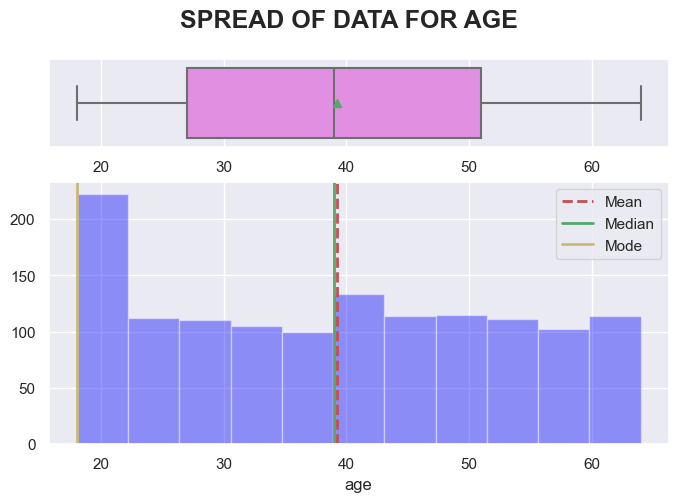

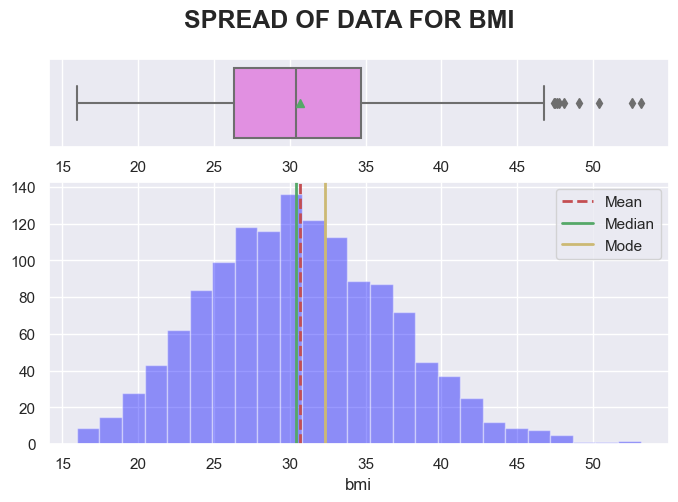

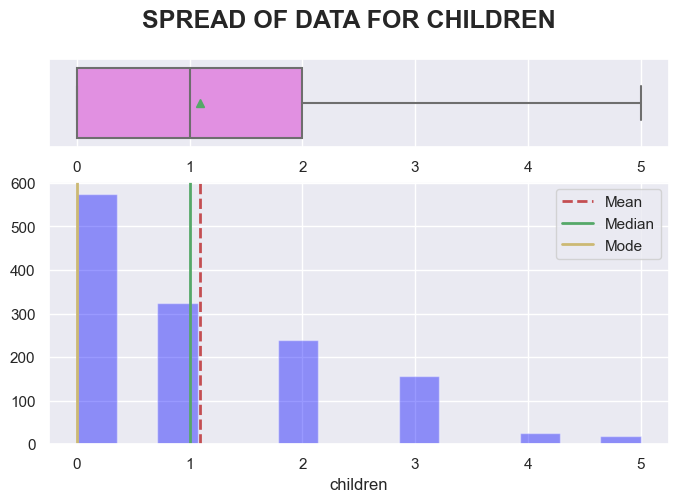

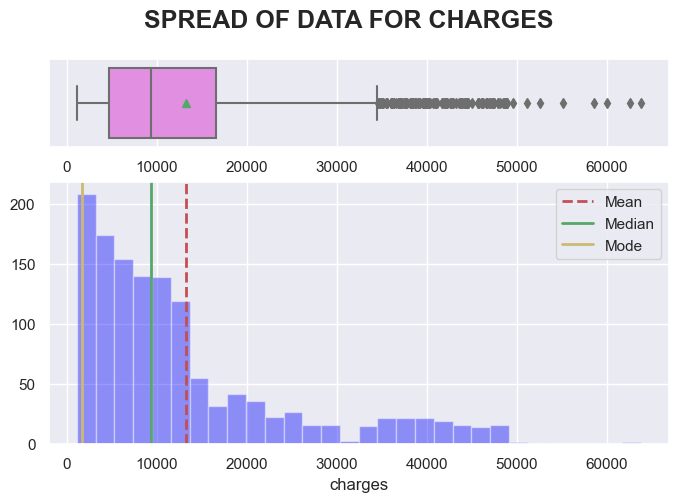

In [14]:
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(insured[list_col[i]])


**Observations**
- Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.
- Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end
- Most of the beneficary have no childrens.
- Charges distrubution is unimodal and is right skewed .Average cost incured to the insurance is appro. 130000 and highest charge is 63770.There are lot of outliers at upper end.

In [15]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage


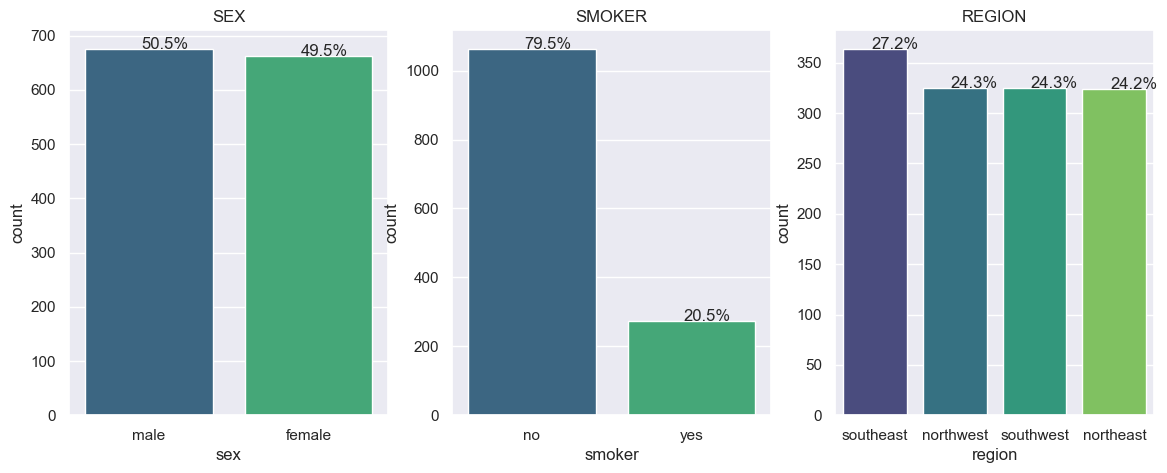

In [16]:
#get all category datatype
list_col=  insured.select_dtypes(['category']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = insured[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=insured , order=order,ax=axes1[i],palette='viridis').set(title=list_col[i].upper())
    bar_perc(axes1[i],insured[list_col[i]])

**Observations**
 - 50.5% of beneficiary are male and 49.5 % are female. Approximately same number of male and female beneficiary.
 - 20.5% of beneficary are smokers.
 - Beneficary are evenly distributed across regions with South East being the most populous one (~27%) with the rest of regions each containing around ~24%
 - Most of the beneficiary don't have kid.

## Bivariate & Multivariate Analysis

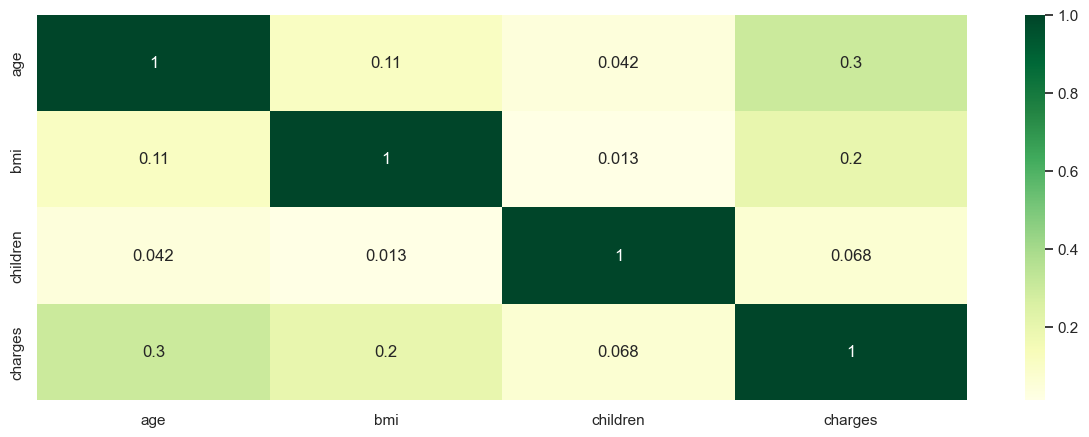

In [17]:
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True ,cmap="YlGn" )
plt.show()

In [18]:
cat_columns=insured.select_dtypes(['category']).columns
cat_columns


Index(['sex', 'smoker', 'region'], dtype='object')

**Observation**
 - There is  very little significant correlation between charges &age and charges and bmi.


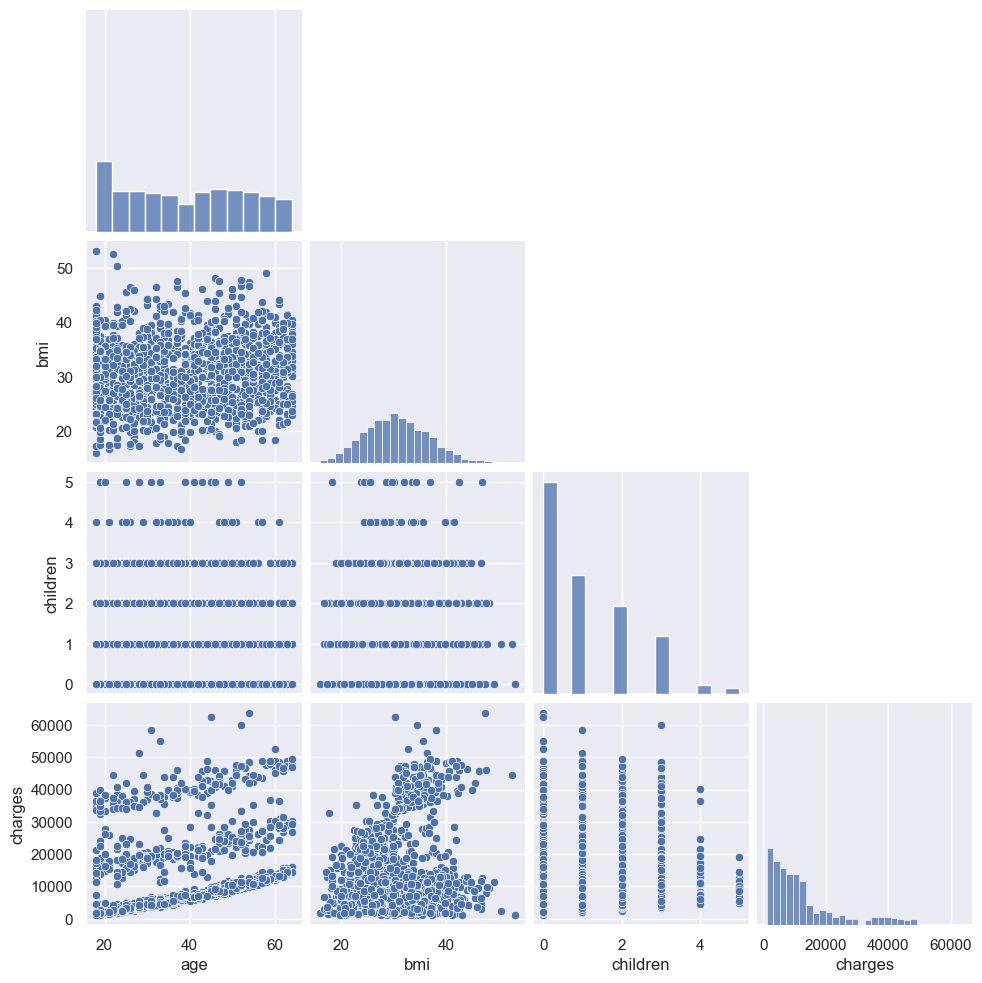

In [19]:
sns.pairplot(data=insured , corner=True)
plt.show()

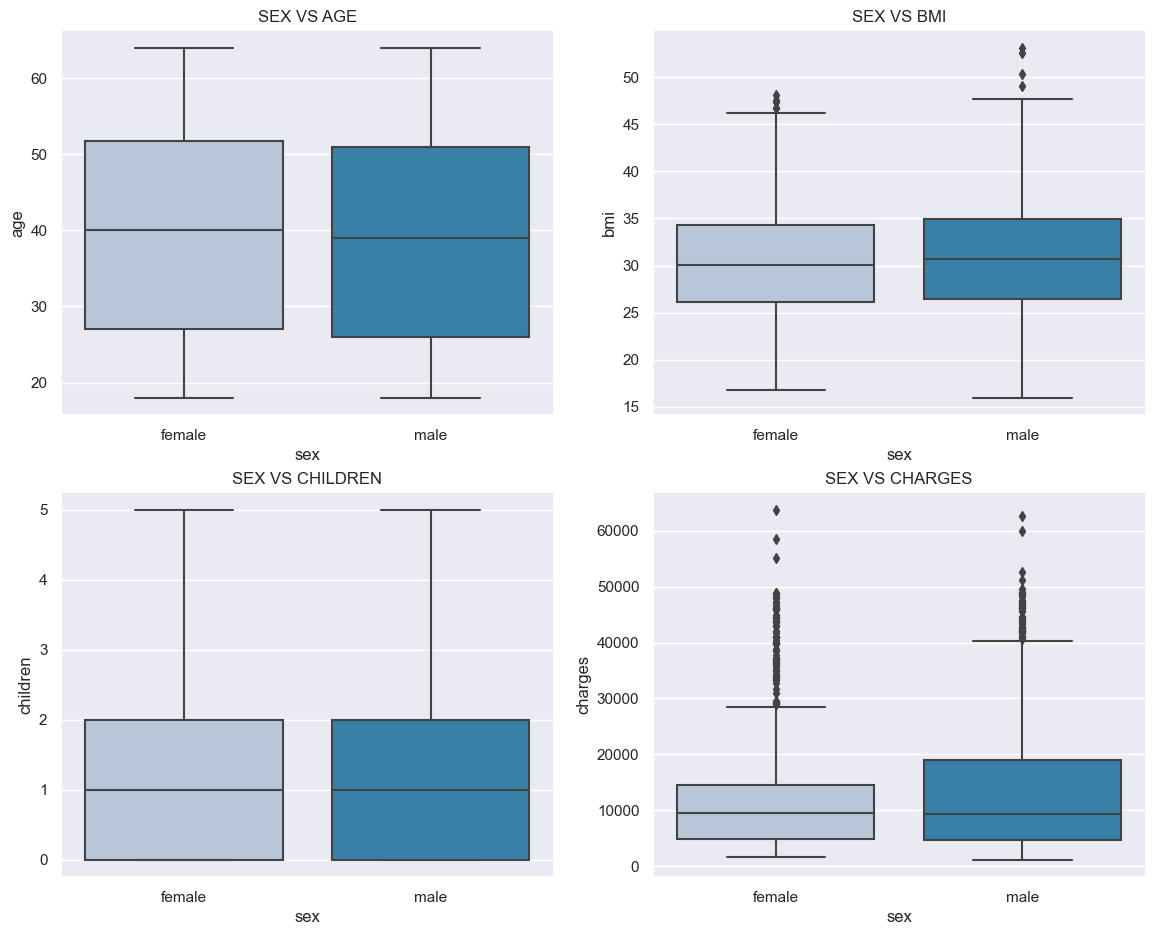

In [20]:
#Sex vs all numerical variable
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['sex'],ax=ax,palette="PuBu", orient='v').set(title='SEX VS '+ list_col[i].upper())



**Observation**
 - Avergae Age of female beneficiary is slightly higher than male beneficiary
 - No of children both male and female beneficary have is same
 - BMI of Male policy holder has many outliers and Average BMI of male is slightly higher than female
 - Male policy holder has incure more charges to insurance compared to female policy holder. There are lot of outliers in female policy holder

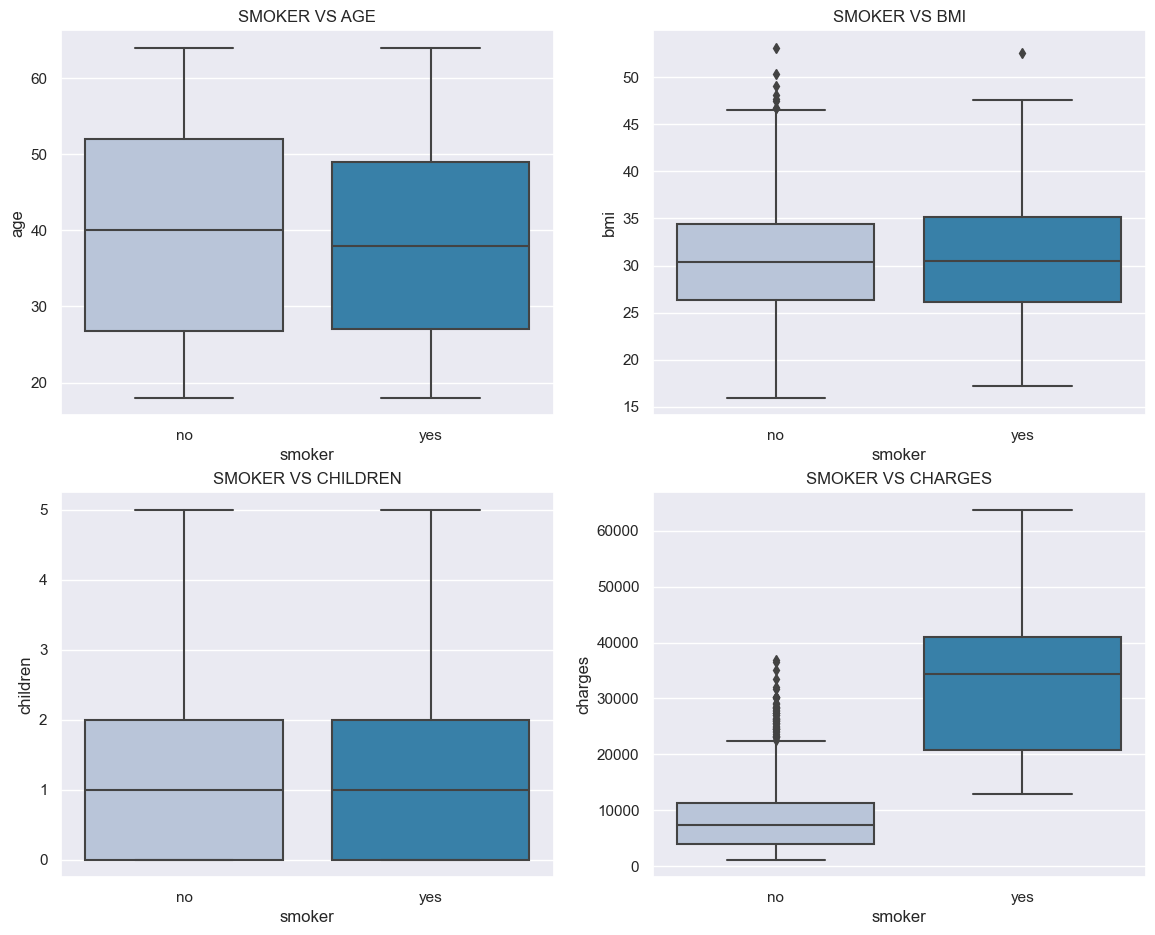

In [21]:
#smoker vs all numerical variables
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['smoker'],ax=ax,palette="PuBu",orient='v').set(title='SMOKER VS '+ list_col[i].upper()  )


**Observation**
- Smoker have incured more cost to insurance than nonsmoker. There are outliers in nonsmoker , need to analyze.
- BMI of non smoker has lot of outliers.

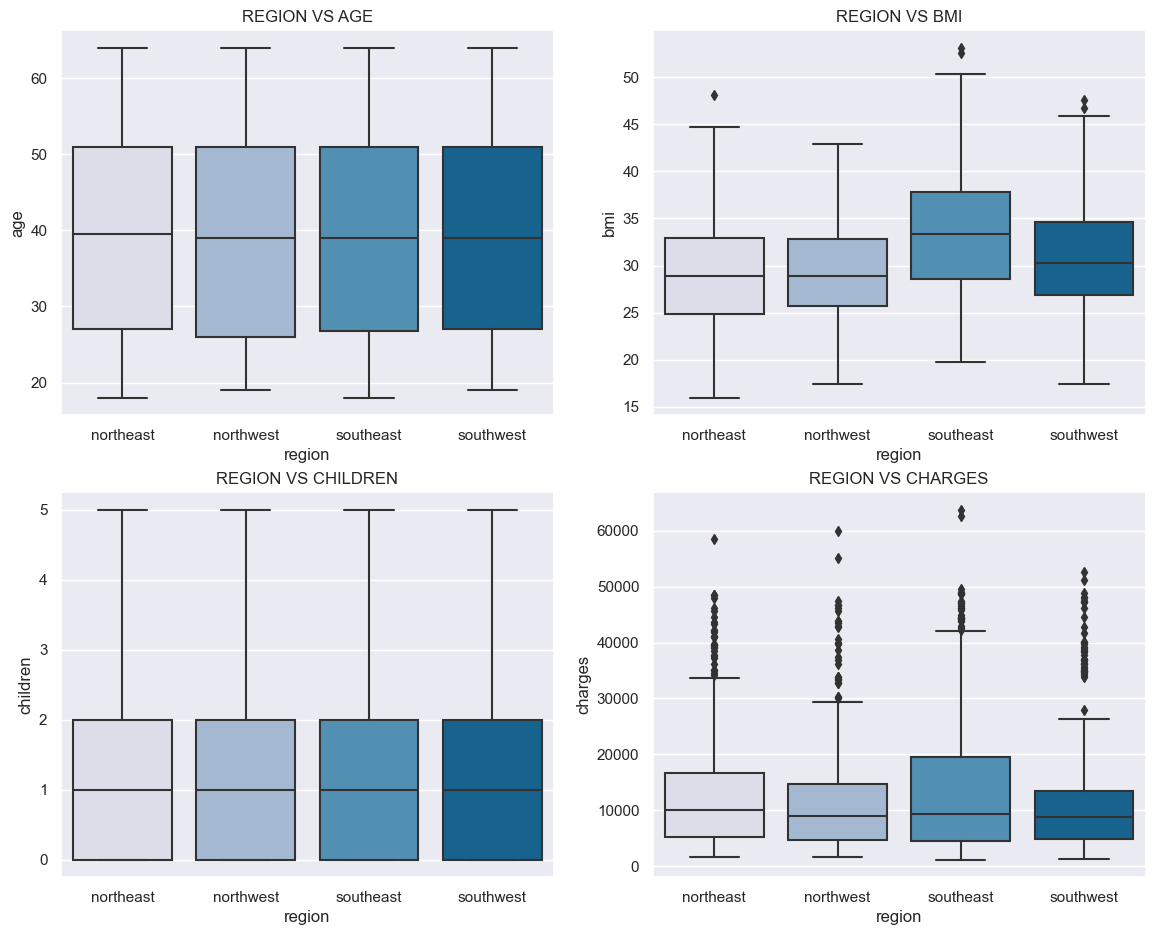

In [22]:
#region vs all numerical variable
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the outliers
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=insured[list_col[i]],x=insured['region'],ax=ax,palette="PuBu",orient='v').set(title='REGION VS '+ list_col[i].upper()  )


**Observations**
 - Age  and numnber of children across regions is almost same.
 - Average Bmi of policy holder from southeast higher compared to other regions
 - Charges incured because of policy holder from southeast is higher compared to othe regions
 - There are lot of outliers on upper end in charges


[Text(0.5, 1.0, 'Smoker vs Sex')]

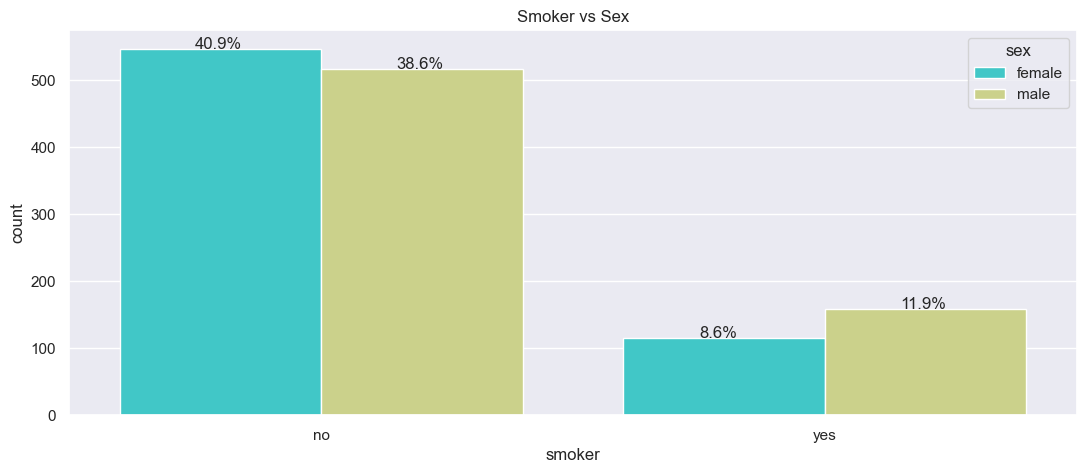

In [23]:
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured,palette='rainbow')
bar_perc(ax,insured['sex'])
ax.set(title="Smoker vs Sex")

[Text(0.5, 1.0, 'Smoker vs Charges')]

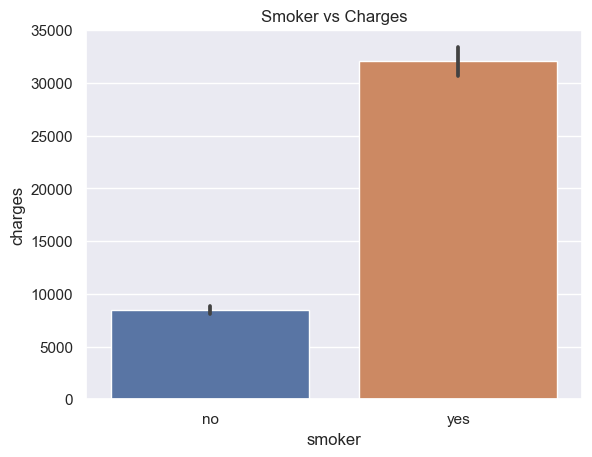

In [24]:
#smoker vs charges
sns.barplot(x=insured.smoker,y=insured.charges).set(title="Smoker vs Charges")

[Text(0.5, 1.0, 'Smoker vs Region')]

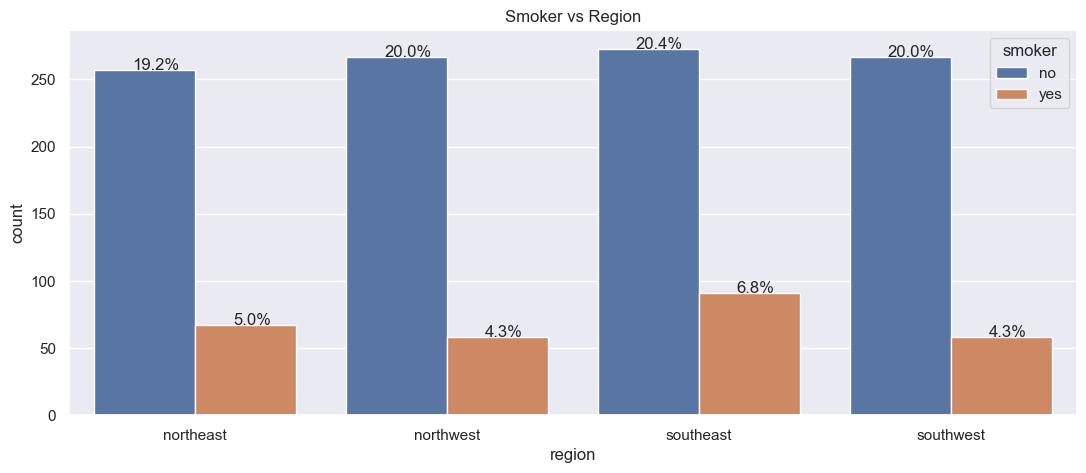

In [25]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['smoker'])
ax.set(title="Smoker vs Region")

**Observation**
- There are more male smokers than female.
- Southeast region has more smokers
- Smoker have more costlier claims than nonsmoker.

[Text(0.5, 1.0, 'Sex vs Region')]

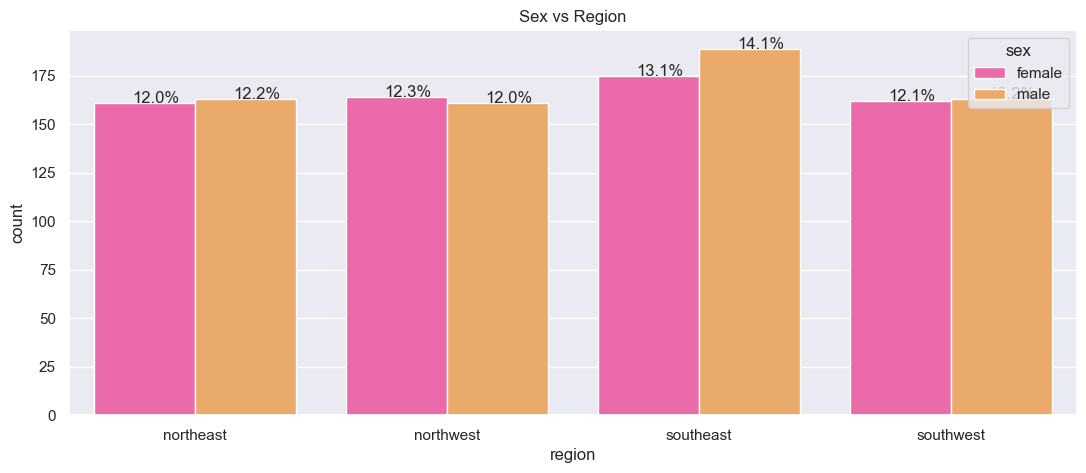

In [26]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
bar_perc(ax,insured['sex'])
ax.set(title="Sex vs Region")

**Observations**
 - There are more smokers in southeast region compared to other regions.

In [27]:
insured.groupby(insured.sex).charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

[Text(0.5, 1.0, 'Children vs Charges')]

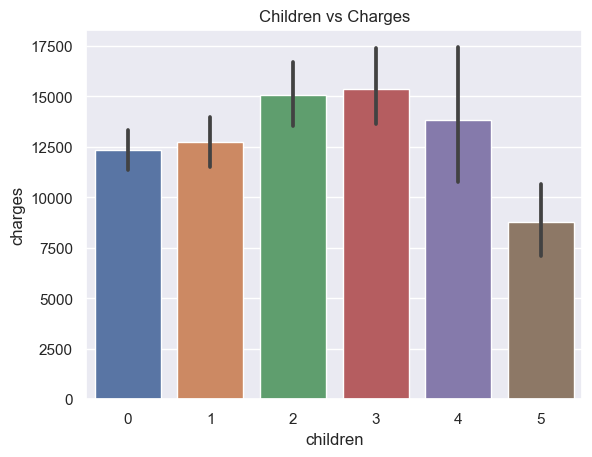

In [28]:
sns.barplot(x=insured.children,y=insured.charges).set(title="Children vs Charges")

[Text(0.5, 1.0, 'Sex Vs Charges')]

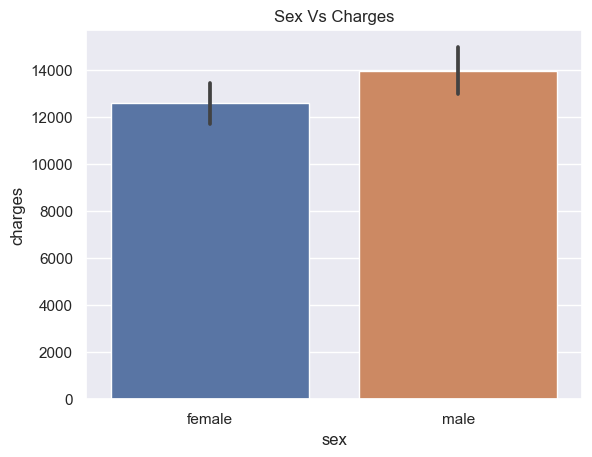

In [29]:
sns.barplot(x=insured.sex,y=insured.charges).set(title='Sex Vs Charges')

[Text(0.5, 1.0, 'Region Vs Charges')]

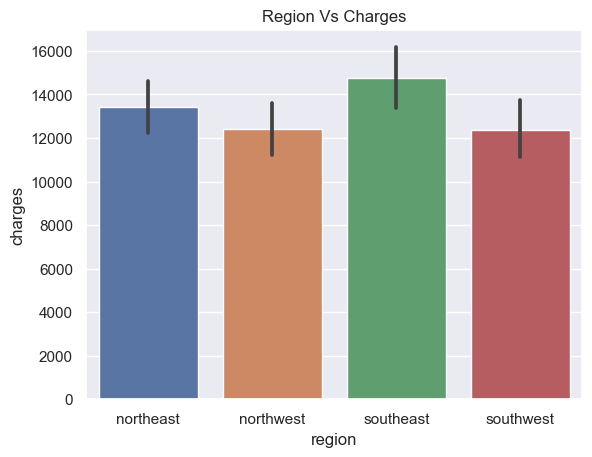

In [30]:
sns.barplot(x='region',y='charges',data=insured).set(title='Region Vs Charges')

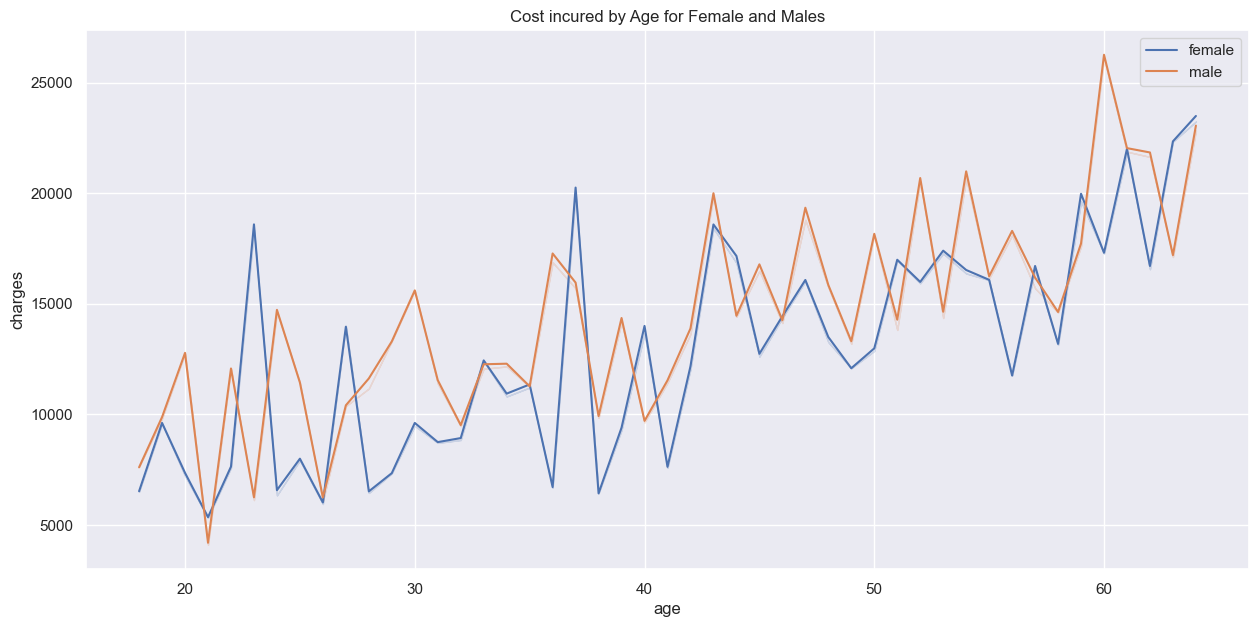

In [31]:
plt.figure(figsize=(15,7))
sns.lineplot(insured["age"],insured["charges"],hue=insured["sex"],ci=0).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

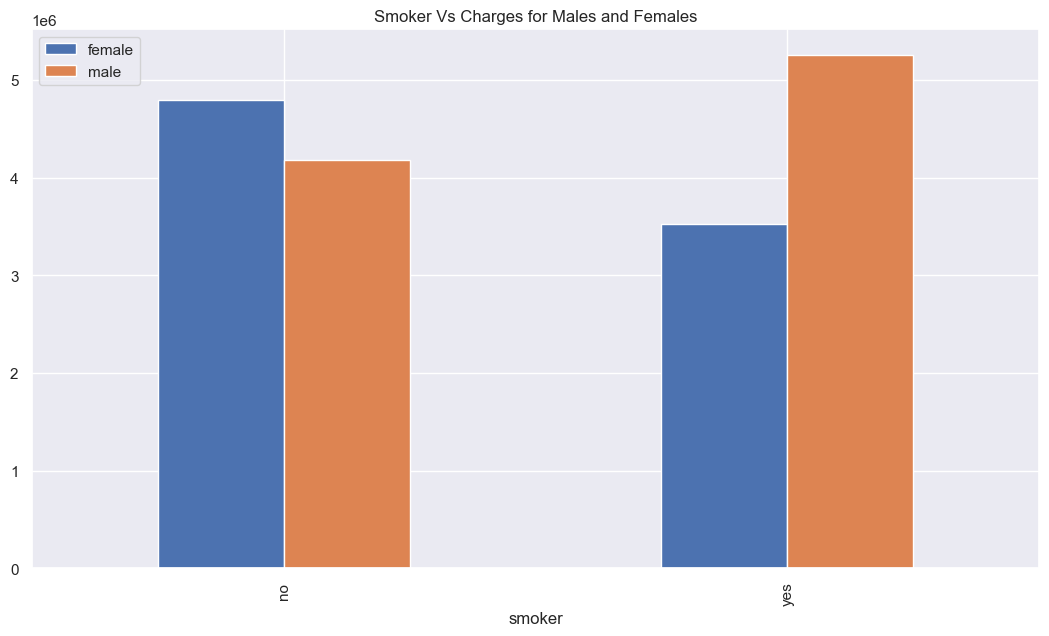

In [32]:
df_smoker_char_sex=pd.crosstab(index=insured.smoker,columns=insured.sex , values=insured.charges,aggfunc='sum')
fig1, axes1=plt.subplots(1,1,figsize=(13, 7))
df_smoker_char_sex.plot(kind='bar',ax=axes1,title="Smoker Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

**Observations**
 - Charges incurred for males are more than charges incured for females
 - With increasing age of policy holder charges incured are going high for both male and female.
 - There some spikes for female at an approximate ages of 23,28,43.
 - Most claims are from southeast regions.
 - Males who smoke have most claims and have higher bills
 - Number of claims made by female who dont smoke is more compared to female who smoke.




In [33]:
#creating groups of bmi
category=pd.cut(insured.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
insured.insert(5,'BMIGroup',category)


In [34]:
insured.head()

,age,sex,bmi,children,smoker,BMIGroup,region,charges
0,19,female,27.900,0,yes,25-35,southwest,16884.92400
1,18,male,33.770,1,no,25-35,southeast,1725.55230
2,28,male,33.000,3,no,25-35,southeast,4449.46200
3,33,male,22.705,0,no,15-25,northwest,21984.47061
4,32,male,28.880,0,no,25-35,northwest,3866.85520


In [35]:
#no of children has no relation with charges
insured.groupby(insured.children).charges.mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [36]:
insured.groupby(insured.BMIGroup).charges.mean()

BMIGroup
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

In [37]:
category1=pd.cut(insured.age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
insured.insert(6,'AgeBin',category1)

In [38]:
insured.groupby(insured.AgeBin).charges.mean()

AgeBin
18-28     9528.142786
28-38    11598.554943
38-48    14334.585843
48-58    15887.954341
58-68    20824.972901
Name: charges, dtype: float64

In [39]:
insured.groupby(['region','sex','smoker']).mean()['charges'].unstack()

smoker                     no           yes
region    sex                              
northeast female  9640.426984  28032.046398
          male    8664.042222  30926.252583
northwest female  8786.998679  29670.824946
          male    8320.689321  30713.181419
southeast female  8440.205552  33034.820716
          male    7609.003587  36029.839367
southwest female  8234.091260  31687.988430
          male    7778.905534  32598.862854

[Text(0.5, 1.0, 'Age Vs Charges')]

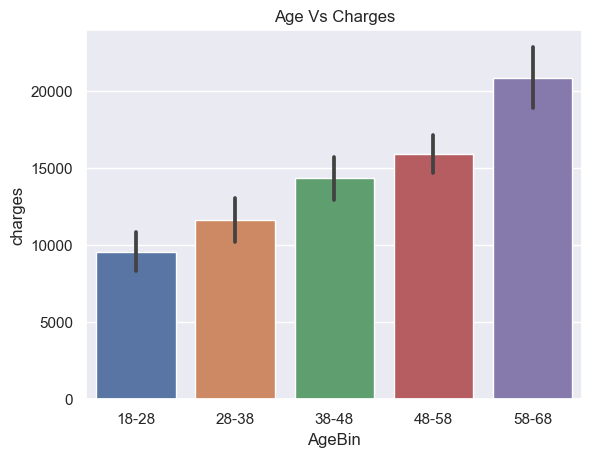

In [40]:
sns.barplot(x=insured.AgeBin,y=insured.charges).set(title='Age Vs Charges')

<AxesSubplot:xlabel='BMIGroup', ylabel='charges'>

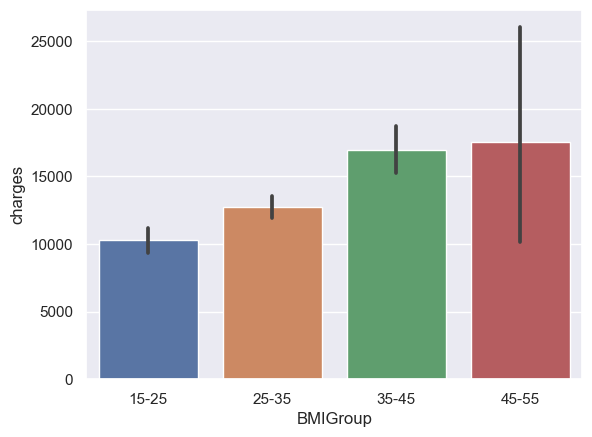

In [41]:
sns.barplot(x=insured.BMIGroup,y=insured.charges)

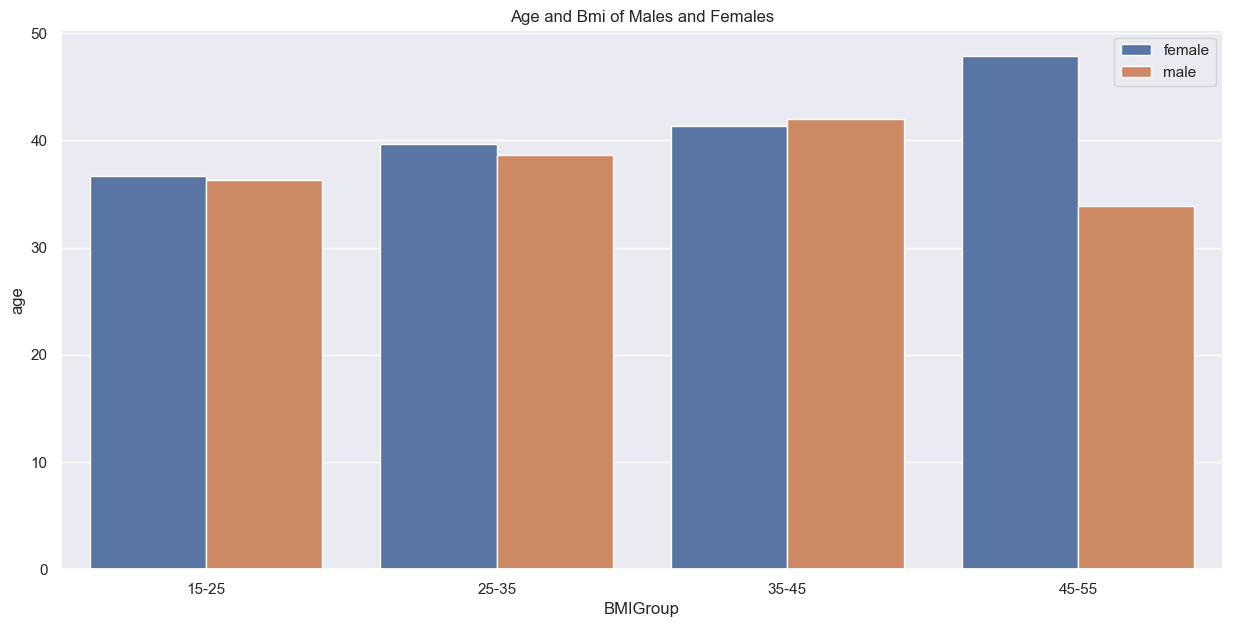

In [42]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["BMIGroup"],y=insured["age"],hue=insured['sex'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

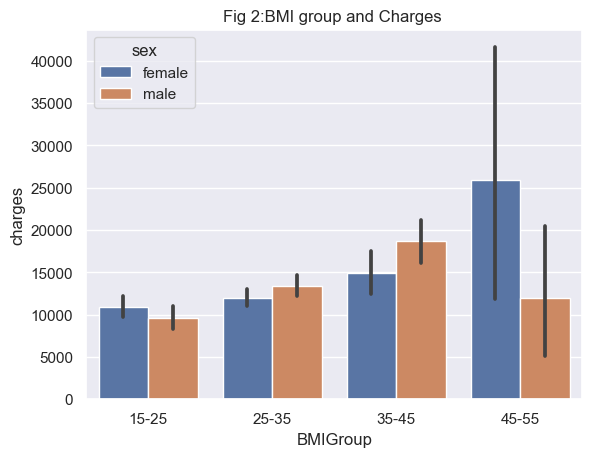

In [43]:
sns.barplot(x='BMIGroup',y='charges',hue='sex',data=insured).set(title="Fig 2:BMI group and Charges " )

**Observations**
- FeMales with most BMI has incured most charges to the insurance company
- BMI for male and females are not same
- Beneficary with higher BMI have incurred more cost to insurance.

In [44]:
pd.crosstab(insured['sex'],insured['children'])


children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


<Figure size 2500x1000 with 0 Axes>

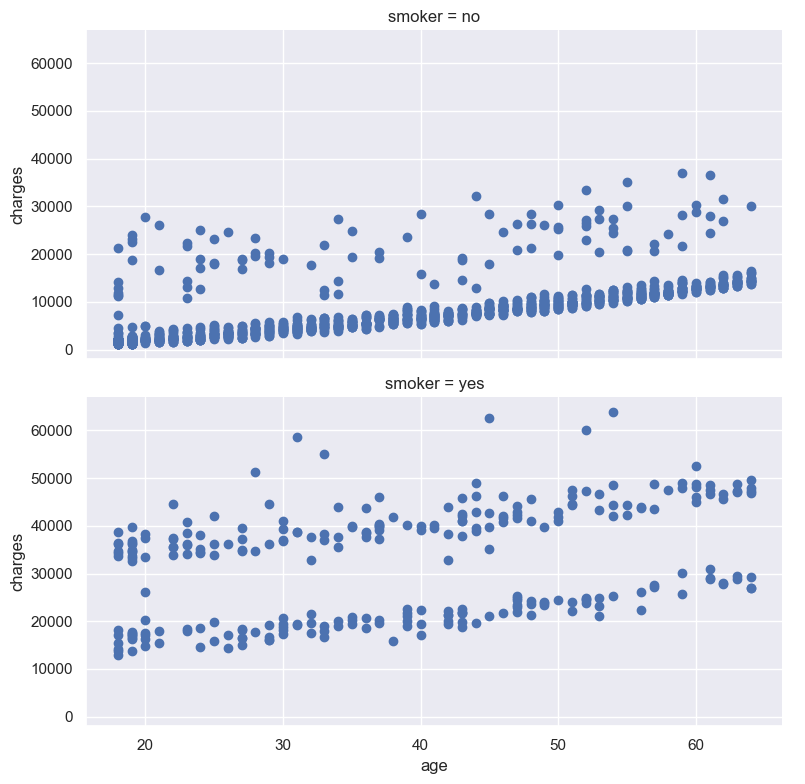

In [45]:
plt.figure(figsize=(25,10))
g=sns.FacetGrid(insured,row='smoker',height=4, aspect=2)
g=(g.map(plt.scatter ,'age','charges').add_legend())

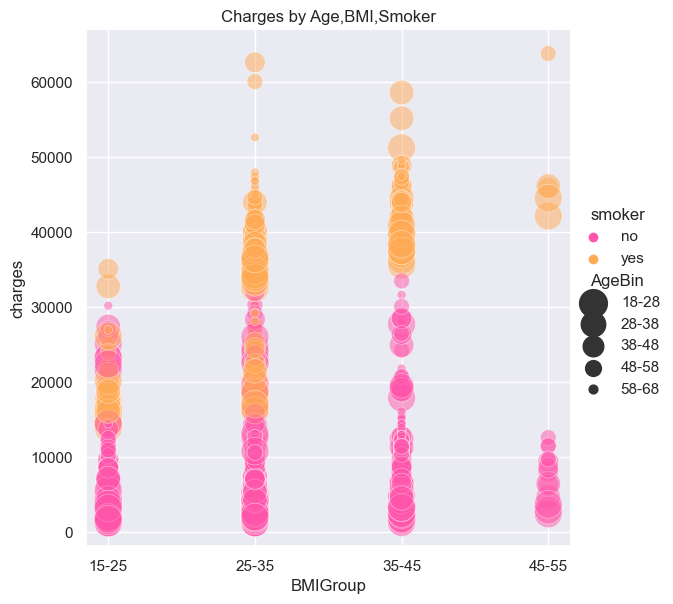

In [46]:
sns.relplot(x=insured.BMIGroup, y=insured.charges, hue=insured.smoker, size= insured.AgeBin,
            sizes=(40, 400), alpha=.5, palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

**Observation**
- Males who smoker have incured more cost compared to nonsmokers.
- As age increased claims increased
-Smoker have higher medical claims

# Conclusion based on EDA
- As expected , as the age of the beneficiary  increases ,the cost to insurance increases.
- Males who smoke have most claims and have higher bills.
- Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.
- Beneficiary with 2 or 3 dependent  have billed higher compared to others people who have 5.This is unusual and may be because of  uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.
- Customer with bmi  >30 are  on higher side of obesity, have more health issues and have higher claims.
- Females with BMI more than 45 have billed higher to insurance.
- Age, BMI and Smoking are important attributes which can cost insurance company more.


# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers
 <br>


$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [47]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.90,0,yes,25-35,18-28,southwest,16884.9240
11,62,female,26.29,0,yes,25-35,58-68,southeast,27808.7251
14,27,male,42.13,0,yes,35-45,18-28,southeast,39611.7577
19,30,male,35.30,0,yes,35-45,28-38,southwest,36837.4670
23,34,female,31.92,1,yes,25-35,28-38,northeast,37701.8768


In [48]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
BMIGroup    274
AgeBin      262
region      274
charges     274
dtype: int64

In [49]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
1,18,male,33.770,1,no,25-35,NaN,southeast,1725.55230
2,28,male,33.000,3,no,25-35,18-28,southeast,4449.46200
3,33,male,22.705,0,no,15-25,28-38,northwest,21984.47061
4,32,male,28.880,0,no,25-35,28-38,northwest,3866.85520
5,31,female,25.740,0,no,25-35,28-38,southeast,3756.62160


In [50]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
BMIGroup    1064
AgeBin      1007
region      1064
charges     1064
dtype: int64

In [51]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[-274:]
charges_yes = smoker.charges
charges_no = nonsmoker.charges

In [52]:
print('Average Cost charged to Insurance for smoker is {} and nonsmoker is {} '.format(charges_yes.mean(),charges_no.mean()))


Average Cost charged to Insurance for smoker is 32050.23183153285 and nonsmoker is 8441.24905576642 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

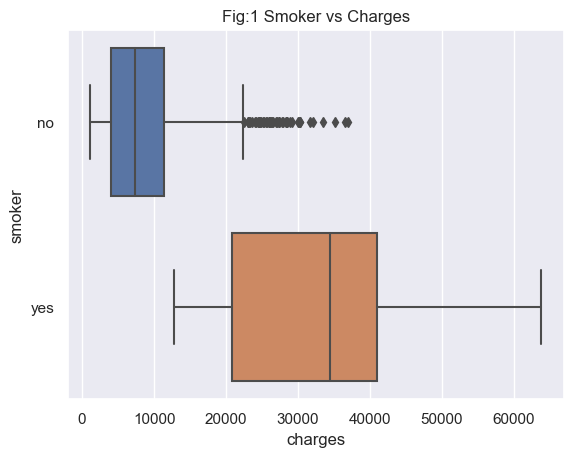

In [53]:
#smoker vs charges
sns.boxplot(x=insured.charges,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [54]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


Test statistic = 30.168384427571915 , Pvalue =2.1604990031680377e-118 , OnetailPvalue = 1.0802495015840189e-118


In [55]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.0802495015840189e-118 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [56]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [57]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

<AxesSubplot:xlabel='bmi', ylabel='Density'>

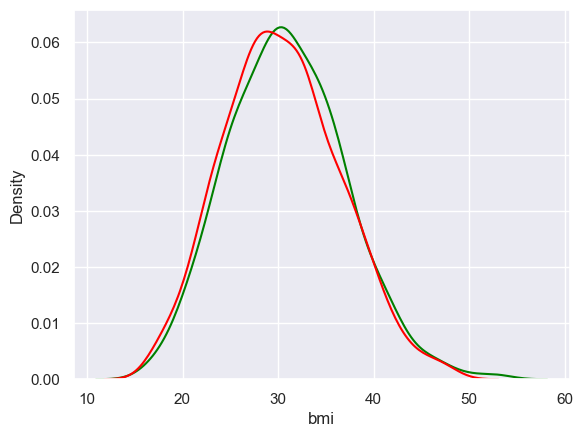

In [58]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)


In [59]:
df_female.bmi.mean()

30.377749244713023

In [60]:
df_male.bmi.mean()

30.943128698224832

In [61]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.696752635752224 , pvalue =  0.08997637178984934


In [62]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


Conclusion:Since P value 0.08997637178984934 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

# 3.Is the proportion of smokers significantly different across different regions?

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypotheses</b></font>

* H<sub>0</sub> Smokers proportions is not significantly different across different regions
* H<sub>a</sub> Smokers proportions is  different across different regions  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify Test</b></font><br>
    Here we are comparing two different categorical variables, smoker and  different region. So perform a  Chi-sq Test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [63]:
contigency= pd.crosstab(insured.region, insured.smoker)
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<AxesSubplot:xlabel='region'>

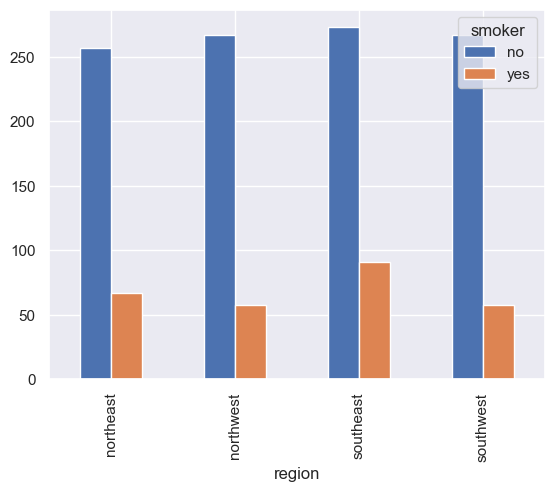

In [64]:
 contigency.plot(kind='bar')

In [65]:
# Using the chi2_contingency test
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , Pvalue: 0.06171954839170541 , Degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [66]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.
    


# 4.Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

<div class ="alert alert-block alert-info">
    <font size=3><b>    Step 1: Define null and alternative hypotheses</b></font>

* H<sub>0</sub>: μ1 = μ2 = μ3  The mean BMI of women with no children , one child,two children is same <br>

* H<sub>a</sub>:  Atleast  one of mean BMI of women is not same <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify Test</b></font><br>
    
One-way ANOVA - Equality of population through variances of samples.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [67]:
# Filtering data of only women with 0, 1 and 2 children
df_female_child = df_female.loc[df_female['children']<=2]
df_female_child.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.90,0,yes,25-35,18-28,southwest,16884.92400
5,31,female,25.74,0,no,25-35,28-38,southeast,3756.62160
6,46,female,33.44,1,no,25-35,38-48,southeast,8240.58960
9,60,female,25.84,0,no,25-35,58-68,northwest,28923.13692
11,62,female,26.29,0,yes,25-35,58-68,southeast,27808.72510


In [68]:
#pd.pivot_table(data=df_female_filtered,index=df_female_filtered.children,columns=df_female_filtered.bmi,values=df_female_filtered.bmi,fill_value=0)
df_female_child.groupby([df_female_child.children]).mean().bmi

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

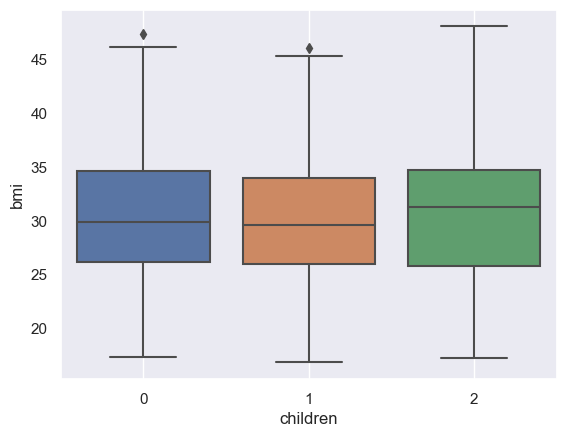

In [69]:
# Women BMI with children 0, 1, 2;
sns.boxplot(x="children", y="bmi", data=df_female_child)
plt.grid()
plt.show()

In [70]:

# Applying ANOVA and cheking each children count (0,1,2) with the bmi;
formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     P value is 0.715858 and it is greater than aplha(0.05) ,We failed to  reject the null hypothesis and conclude that mean Bmi of women  with no children,one children, two children is same.
    

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.
